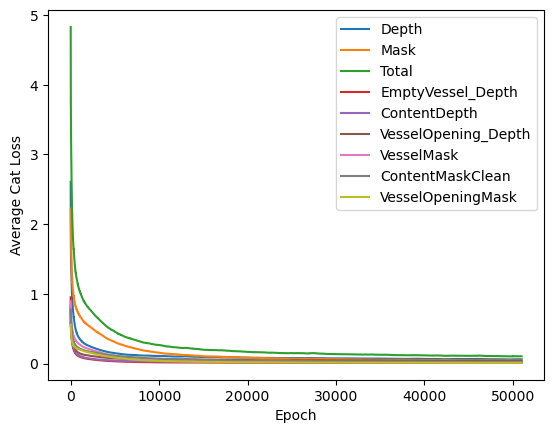

In [5]:
import matplotlib.pyplot as plt

x = []  # epoch
y_depth = []
y_mask = []
y_total = []
y_emptyvessel_depth = []
y_contentdepth = []
y_vesselopening_depth = []
y_vesselmask = []
y_contentmaskclean = []
y_vesselopeningmask = []

# read data from file
with open("logs1/TrainLoss_24032023-1638.txt") as f:
    # delete first line
    f.readline()

    for line in f:
        fields = line.strip().split("\t")
        epoch = int(fields[0])
        x.append(epoch)
        y_depth.append(float(fields[1].split()[4]))
        y_mask.append(float(fields[2].split()[4]))
        y_total.append(float(fields[3].split()[4]))
        y_emptyvessel_depth.append(float(fields[4].split()[4]))
        y_contentdepth.append(float(fields[5].split()[4]))
        y_vesselopening_depth.append(float(fields[6].split()[4]))
        y_vesselmask.append(float(fields[7].split()[4]))
        y_contentmaskclean.append(float(fields[8].split()[4]))
        y_vesselopeningmask.append(float(fields[9].split()[4]))

# plot the data
plt.plot(x, y_depth, label="Depth")
plt.plot(x, y_mask, label="Mask")
plt.plot(x, y_total, label="Total")
plt.plot(x, y_emptyvessel_depth, label="EmptyVessel_Depth")
plt.plot(x, y_contentdepth, label="ContentDepth")
plt.plot(x, y_vesselopening_depth, label="VesselOpening_Depth")
plt.plot(x, y_vesselmask, label="VesselMask")
plt.plot(x, y_contentmaskclean, label="ContentMaskClean")
plt.plot(x, y_vesselopeningmask, label="VesselOpeningMask")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Average Cat Loss")
plt.show()